# Классификация изображений

In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import time
import scikitplot as skplt
from sklearn.model_selection import learning_curve

In [2]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


## Задания для выполнения

1.	Загрузите датасет Olivetti faces

In [3]:
faces = fetch_olivetti_faces()
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

2.	Познакомьтесь с описанием и структурой датасета. Описание можно найти в документации

In [4]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

3.	Выведите информацию о количественных параметрах датасета

In [5]:
x = faces.data # Изображение с расщеленным изображением лица исходного размера 64 x 64 пикселей
y = faces.target # Идентификатор субъекта
z = faces.images # Каждая строка представляет изображение лица, соответствующее одному из 40 субъектов набора данных

print("x shape:", x.shape)
print("y shape:", y.shape)
print("z shape", x.shape)

x shape: (400, 4096)
y shape: (400,)
z shape (400, 4096)


4.	Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib

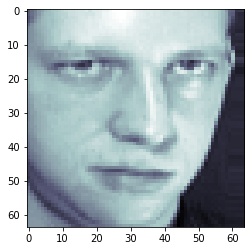

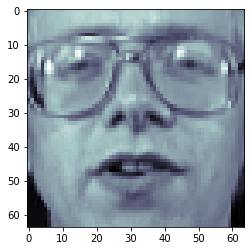

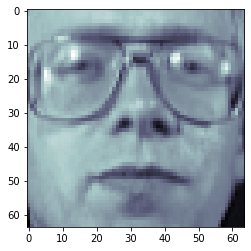

In [6]:
for i in range (9,12):
    plt.imshow(faces.images[i], cmap = plt.cm.bone)
    plt.show()

5.	Разделите эти данные на тестовую и обучающую выборки

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=True)

In [8]:
reg,acc,prec,rec,t = [], [], [], [], []

6.	Постройте модель классификатора метода опорных векторов для идентификации человека по изображению

In [9]:
def make_model(x_train, y_train, x_test, y_test, model, name = ''):
    start_time = time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    reg.append(name)
    acc.append(metrics.accuracy_score(y_test, y_pred))
    prec.append(metrics.precision_score(y_test, y_pred, average="macro"))
    rec.append(metrics.recall_score(y_test, y_pred, average="macro"))
    t.append(time.time() - start_time)
    
    train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1.0,10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.subplots(1, figsize=(10,5))
    plt.plot(train_sizes, train_mean, color="b",  label="Training score")
    plt.plot(train_sizes, test_mean, color="r", label="Cross-validation score")
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.show()

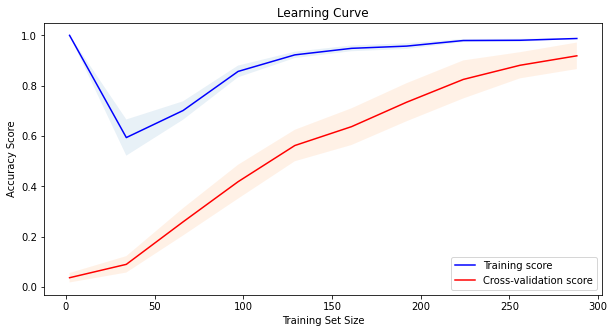

In [12]:
SVM = svm.SVC()
make_model(x_train, y_train, x_test, y_test, SVM, name = 'SVM')

7.	Оцените качество модели на тестовой выборке с помощью следующих метрик:

a.	достоверность предсказания (accuracy)

b.	точность (precision)

c.	полнота (recall)

8.	Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки

In [11]:
ex = pd.DataFrame(columns = ['name','accuracy','precision','recall'])
ex['name'] = reg
ex['accuracy'] = acc
ex['precision'] = prec
ex['recall'] = rec
ex['time'] = t
ex

,name,accuracy,precision,recall,time
0,SVM,0.8375,0.797436,0.818376,0.323235


## Дополнительные задания

1.	Постройте модели классификации на основе следующих методов:

a.	логистическая регрессия (LogisticRegression)

b.	метод опорных векторов с гауссовым ядром (SVC)

c.	метод опорных векторов с полиномиальным ядром (SVC)

d.	метод k ближайших соседей (KNeighborsClassifier)

e.	многослойный перцептрон (MLP)

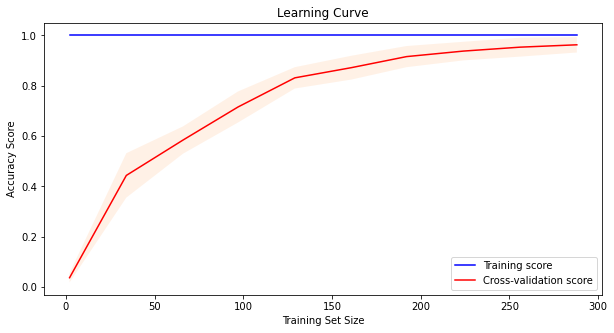

In [12]:
LR = LogisticRegression()
make_model(x_train, y_train, x_test, y_test, LR, name = 'LR')

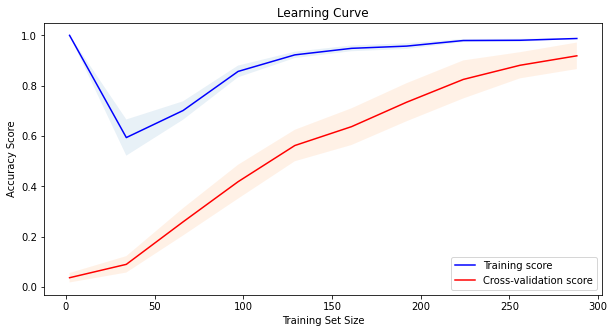

In [13]:
gauss_SVC= svm.SVC(kernel='rbf')
make_model(x_train, y_train, x_test, y_test, gauss_SVC, name = 'gauss_SVC')

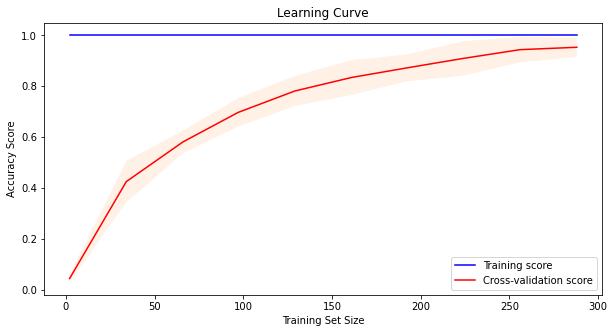

In [14]:
poly_SVC= svm.SVC(kernel='poly')
make_model(x_train, y_train, x_test, y_test, poly_SVC, name = 'poly_SVC')

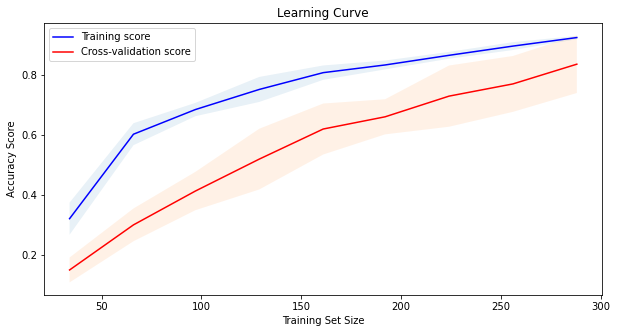

In [15]:
KNC = KNeighborsClassifier()
make_model(x_train, y_train, x_test, y_test, KNC, name = 'KNC')

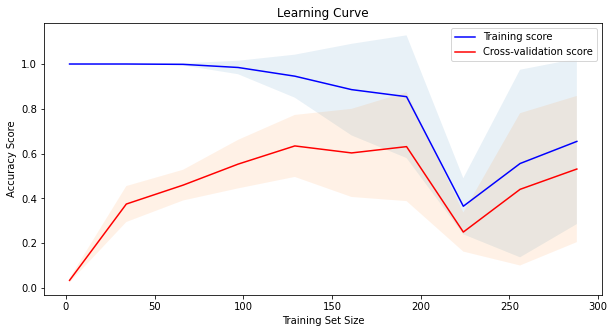

In [16]:
MLPC = MLPClassifier()
make_model(x_train, y_train, x_test, y_test, MLPC, name = 'MLPC')

2.	Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую

In [17]:
ex1 = pd.DataFrame(columns = ['name','accuracy','precision','recall','time'])
ex1['name'] = reg
ex1['accuracy'] = acc
ex1['precision'] = prec
ex1['recall'] = rec
ex1['time'] = t
ex1

,name,accuracy,precision,recall,time
0,SVM,0.8375,0.797436,0.818376,0.323235
1,LR,0.9625,0.914474,0.907895,1.895900
2,gauss_SVC,0.8375,0.797436,0.818376,0.355573
3,poly_SVC,0.9375,0.868860,0.881579,0.239560
4,KNC,0.8125,0.803724,0.786325,0.075354
5,MLPC,0.6750,0.633750,0.620833,2.394098


   Согласно показателям, наиболее производительными являются модель логистической регрессии и метод опорных векторов с полиномиальным ядром. При этом логистическая регрессия имеет чуть более высокие показатели accuracy, precision и recall, но poly_SVC метод работает быстрее почти в 10 раз

3.	Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели

4.	Сделайте замеры времени обучения для каждой модели. Сделайте вывод о сравнительной производительности моделей.

   По скорости метод k ближайших соседей показал себя с наилучшей стороны, хотя он не отличается высокими показателями accuracy и recall